In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("Downloads/Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.head(11)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [5]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
data.tail(12)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
588,YES,Married,85076,93242,27,YES
589,YES,Married,31633,30774,10,NO
590,NO,Married,43018,85195,14,YES
591,YES,Single,27394,132859,18,YES
592,YES,Single,68152,75143,16,NO
593,NO,Divorced,84775,131963,10,YES
594,NO,Married,47364,97526,9,YES
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES


In [7]:
data.shape

(600, 6)

In [8]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
data=pd.get_dummies(data,columns=['Urban','Undergrad','Marital.Status'],drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,1,0,0,1
1,33700,134075,18,1,1,0,0
2,36925,160205,30,1,0,1,0
3,50190,193264,15,1,1,0,1
4,81002,27533,28,0,0,1,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,1,0,0
596,69967,55369,2,1,1,0,0
597,47334,154058,0,1,0,0,0
598,98592,180083,17,0,1,1,0


In [11]:
data.head(8)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,68833,50047,10,1,0,0,1
1,33700,134075,18,1,1,0,0
2,36925,160205,30,1,0,1,0
3,50190,193264,15,1,1,0,1
4,81002,27533,28,0,0,1,0
5,33329,116382,0,0,0,0,0
6,83357,80890,8,1,0,0,0
7,62774,131253,3,1,1,0,1


In [12]:
data.describe()

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.503333,0.520000,0.323333,0.361667
std,26204.827597,49850.075134,8.842147,0.500406,0.500017,0.468139,0.480884
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,1.000000,0.000000,0.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.shape

(600, 7)

In [14]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [15]:
data.head(11)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc
0,68833,50047,10,1,0,0,1,Good
1,33700,134075,18,1,1,0,0,Good
2,36925,160205,30,1,0,1,0,Good
3,50190,193264,15,1,1,0,1,Good
4,81002,27533,28,0,0,1,0,Good
5,33329,116382,0,0,0,0,0,Good
6,83357,80890,8,1,0,0,0,Good
7,62774,131253,3,1,1,0,1,Good
8,83519,102481,12,1,0,0,1,Good
9,98152,155482,4,1,1,0,0,Good


In [16]:
df = pd.get_dummies(data,columns = ["TaxInc"],drop_first=True)
df.head(20)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
0,68833,50047,10,1,0,0,1,1
1,33700,134075,18,1,1,0,0,1
2,36925,160205,30,1,0,1,0,1
3,50190,193264,15,1,1,0,1,1
4,81002,27533,28,0,0,1,0,1
5,33329,116382,0,0,0,0,0,1
6,83357,80890,8,1,0,0,0,1
7,62774,131253,3,1,1,0,1,1
8,83519,102481,12,1,0,0,1,1
9,98152,155482,4,1,1,0,0,1


In [17]:
df.drop(['Taxable.Income'],axis=1,inplace=True)

In [18]:
df.describe()

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.503333,0.520000,0.323333,0.361667,0.793333
std,49850.075134,8.842147,0.500406,0.500017,0.468139,0.480884,0.405252
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,106493.500000,15.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
0,50047,10,1,0,0,1,1
1,134075,18,1,1,0,0,1
2,160205,30,1,0,1,0,1
3,193264,15,1,1,0,1,1
4,27533,28,0,0,1,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,1,0,0,1
596,55369,2,1,1,0,0,1
597,154058,0,1,0,0,0,1
598,180083,17,0,1,1,0,1


In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
df_norm = norm_func(df.iloc[:,0:])
df_norm.tail(10)

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,TaxInc_Good
590,0.341473,0.466667,1.0,0.0,1.0,0.0,1.0
591,0.615406,0.600000,1.0,1.0,0.0,1.0,0.0
592,0.283703,0.533333,0.0,1.0,0.0,1.0,1.0
593,0.610256,0.333333,1.0,0.0,0.0,0.0,1.0
594,0.412341,0.300000,1.0,0.0,1.0,0.0,1.0
595,0.078811,0.233333,1.0,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,1.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,1.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


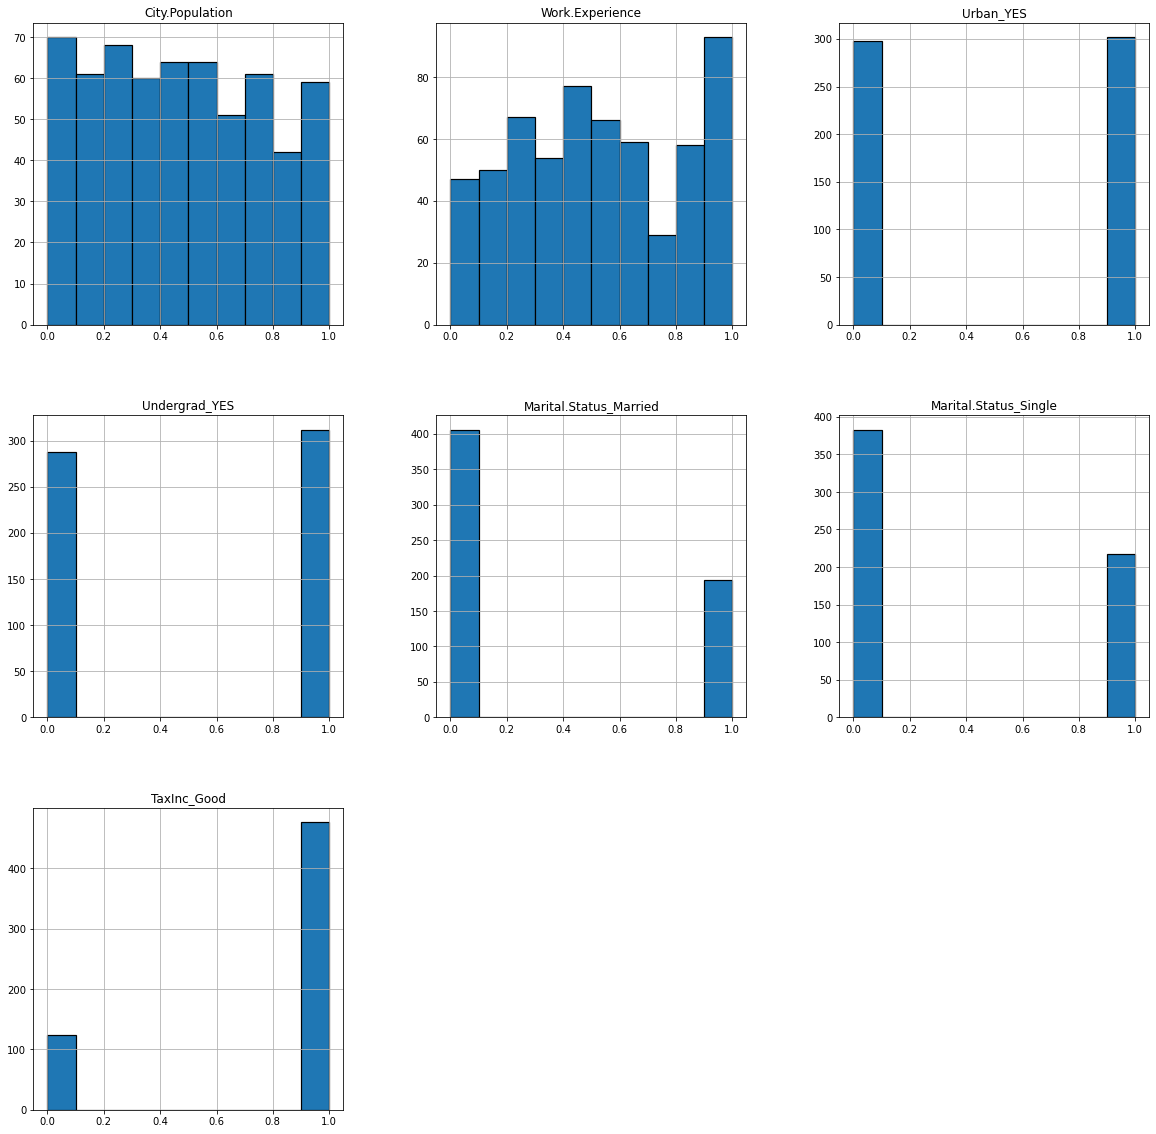

In [22]:
# Visulazing the distibution of the data for every feature
df_norm.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [35]:
x=df_norm.iloc[:,0:7]
y=df_norm["TaxInc_Good"]

In [38]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [39]:
y.value_counts()

1.0    476
0.0    124
Name: TaxInc_Good, dtype: int64

# Model building using Random forest

In [44]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()) 

1.0


In [42]:
#Predicting on test data
preds = model.predict(x_test) 

In [43]:
model.feature_importances_ 

array([0.02846843, 0.01436074, 0.00310812, 0.00274686, 0.00561075,
       0.00262321, 0.9430819 ])